In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as pimg 
import tensorflow as tf
import pandas as pd
import numpy as np
import random 
import os
from tensorflow import keras

In [2]:
digits_mnist = keras.datasets.mnist
(train_images,train_labels),(test_images,test_labels) = digits_mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [7]:
np.unique(train_images)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [8]:
train_labels[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

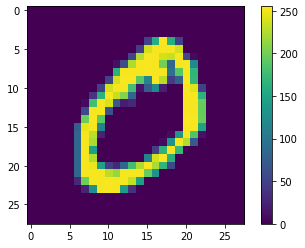

In [9]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

# PREPROCESSING
_Here we will carry out normalization i.e converting the image pixels to values between 0 and 1_

In [10]:
train_images = train_images/ 255.0
test_images = test_images/ 255.0

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # input layer
    keras.layers.Dense(128,activation='relu'), # hidden layer
    keras.layers.Dense(10,activation='softmax'), # output layer
])


In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [15]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2531 - accuracy: 0.9283
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1097 - accuracy: 0.9672
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0762 - accuracy: 0.9771
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0562 - accuracy: 0.9827
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0443 - accuracy: 0.9864
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0342 - accuracy: 0.9894
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0273 - accuracy: 0.9919
Epoch 8/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0230 - accuracy: 0.9930
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0187 - accuracy: 0.9944
Epoch 10/10
1875/1875 [==============================] - 12s 6ms/step - loss:

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print('Test Accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0823 - accuracy: 0.9769
Test Accuracy: 0.9768999814987183


lets have some fun trying to predict the first five test images

In [17]:
predictions = model.predict(test_images[:5])
print(predictions)

[[2.4766780e-10 3.4187518e-13 5.5185449e-08 7.2163587e-08 5.3827157e-15
  3.8891647e-11 1.0506556e-17 9.9999988e-01 5.6332250e-10 4.5212420e-08]
 [2.5831869e-12 3.9902307e-06 9.9999428e-01 1.6801828e-06 3.6096513e-19
  5.2004601e-10 8.2797987e-12 2.1769731e-18 2.8430238e-08 2.3545844e-13]
 [3.5921421e-09 9.9878579e-01 6.1757681e-05 4.2937899e-07 3.7849857e-06
  1.1655603e-06 9.6114218e-07 8.3013823e-05 1.0629707e-03 7.0581258e-08]
 [9.9999881e-01 4.7228253e-11 6.3332942e-07 1.7631734e-10 2.5405109e-13
  5.9849063e-11 1.6309349e-08 6.2801558e-07 4.9827579e-13 1.0188158e-08]
 [4.6607209e-08 7.2298321e-14 3.7252588e-09 1.1663959e-11 9.9997818e-01
  9.4399991e-12 2.7422060e-09 1.8487646e-07 1.3993420e-10 2.1526021e-05]]


In [20]:
print(np.argmax(predictions[0]))

7


In [21]:
print(predictions[0])

[2.4766780e-10 3.4187518e-13 5.5185449e-08 7.2163587e-08 5.3827157e-15
 3.8891647e-11 1.0506556e-17 9.9999988e-01 5.6332250e-10 4.5212420e-08]


In [19]:
print(test_labels[0])

7


**SO THE MODEL KIND OF PREDICTS OUTPUT USING A PROBABILITY SCORE AND THE CLASS WITH THE CLOSEST SCORE TO 1 , GETS CHOSEN AS THE PREDICTED CLASS**

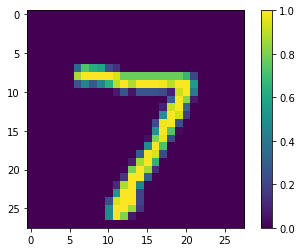

In [22]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [23]:
model.save('digit_classification.h5')

😁😁😀😀
DEEP LEARNING == FUN == True